# SVM Model

In [2]:
import pandas as pd

data = pd.read_csv('./Ordinal Encoded with Scaling (remember to imbalance check in each model).csv')
data.head(5)

,Unnamed: 0,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,...,Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,0,0.826081,0.722049,0.486024,-0.562497,1.411598,-0.581565,-0.270233,-0.334392,1.378125,...,-0.880700,-1.088087,-1.196072,-0.822769,1.244915,-1.747111,-1.576433,0.128714,-0.362683,0
1,1,0.826081,0.722049,0.486024,-0.249763,-0.012407,-0.581565,-0.270233,-0.334392,-2.522158,...,-0.880700,0.919045,0.836070,-0.822769,1.244915,-1.747111,-1.576433,1.458326,-1.925901,1
2,2,0.826081,-1.384947,0.486024,-0.562497,-0.724409,-0.581565,-0.270233,0.474571,-1.547087,...,-0.880700,-1.088087,0.836070,-0.822769,-0.165943,-1.747111,-1.576433,-1.200899,-0.362683,1
3,3,0.826081,0.722049,0.486024,-0.562497,-0.724409,-0.581565,-0.270233,-0.334392,0.403054,...,-0.342697,-1.088087,-1.196072,1.215409,1.244915,-1.747111,-0.716636,1.458326,-1.404828,1
4,4,0.826081,-1.384947,0.486024,-0.562497,-0.724409,-0.581565,-0.270233,-0.334392,-0.572016,...,-0.342697,0.919045,0.836070,1.215409,0.539486,0.063085,0.143161,-1.200899,-0.362683,0


In [3]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import svm

train, test = train_test_split(data, test_size=0.2, random_state=21)
data.head(5)

X_train, y_train = train.copy().drop(columns=['Your level of satisfaction in Online Education']), train['Your level of satisfaction in Online Education']
X_test, y_test = test.copy().drop(columns=['Your level of satisfaction in Online Education']), test['Your level of satisfaction in Online Education']
scaler = StandardScaler().fit_transform(X_train)

svm_linear = svm.SVC(kernel = 'linear')
svm_linear.fit(scaler, y_train)


svm_rbf = svm.SVC(kernel = 'rbf')
svm_rbf.fit(scaler, y_train)

print('##### SVC with linear kernel #####')
print(classification_report(y_test, svm_linear.predict(X_test)), '\n')
print('##### SVC with rbf kernel #####')
print(classification_report(y_test, svm_rbf.predict(X_test)), '\n')

##### SVC with linear kernel #####
              precision    recall  f1-score   support

           0       1.00      0.02      0.04       112
           1       0.00      0.00      0.00        40
           2       0.27      1.00      0.42        55

    accuracy                           0.28       207
   macro avg       0.42      0.34      0.15       207
weighted avg       0.61      0.28      0.13       207
 

##### SVC with rbf kernel #####
              precision    recall  f1-score   support

           0       1.00      0.01      0.02       112
           1       0.00      0.00      0.00        40
           2       0.27      1.00      0.42        55

    accuracy                           0.27       207
   macro avg       0.42      0.34      0.15       207
weighted avg       0.61      0.27      0.12       207
 



c:\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [4]:
from imblearn.over_sampling import RandomOverSampler

print(data['Your level of satisfaction in Online Education'].value_counts())

#oversample
oversample = RandomOverSampler(random_state=21)
X_os, y_os = oversample.fit_resample(X_train, y_train)
print(y_os.value_counts())

scaler = StandardScaler().fit_transform(X_os)

svm_linear = svm.SVC(kernel = 'linear')
svm_linear.fit(scaler, y_os)


svm_rbf = svm.SVC(kernel = 'rbf')
svm_rbf.fit(scaler, y_os)

print('##### SVC with linear kernel #####')
print(classification_report(y_test, svm_linear.predict(X_test)), '\n')
print('##### SVC with rbf kernel #####')
print(classification_report(y_test, svm_rbf.predict(X_test)), '\n')

0    541
2    251
1    241
Name: Your level of satisfaction in Online Education, dtype: int64
0    429
1    429
2    429
Name: Your level of satisfaction in Online Education, dtype: int64
##### SVC with linear kernel #####
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       112
           1       0.00      0.00      0.00        40
           2       0.27      1.00      0.42        55

    accuracy                           0.27       207
   macro avg       0.09      0.33      0.14       207
weighted avg       0.07      0.27      0.11       207
 

##### SVC with rbf kernel #####
              precision    recall  f1-score   support

           0       1.00      0.01      0.02       112
           1       0.00      0.00      0.00        40
           2       0.27      1.00      0.42        55

    accuracy                           0.27       207
   macro avg       0.42      0.34      0.15       207
weighted avg       0.61      0.27   

c:\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

Confusion matrix, without normalization
[[98  9  5]
 [26 14  0]
 [38  1 16]]
Normalized confusion matrix
[[0.88 0.08 0.04]
 [0.65 0.35 0.  ]
 [0.69 0.02 0.29]]


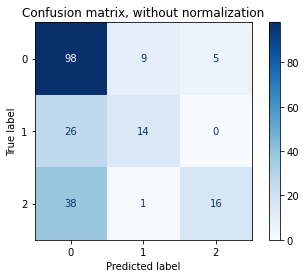

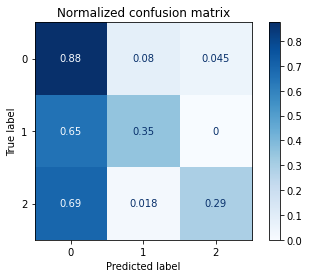

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel="linear", C=0.01).fit(X_train, y_train)

# np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        #display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
        
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()